In [2]:
dist(USArrests,method="manhattan")

               Alabama Alaska Arizona Arkansas California Colorado Connecticut
Alaska            63.5                                                        
Arizona           94.9   78.4                                                 
Arkansas          60.1  101.2   146.2                                         
California        96.6   60.9    39.5    148.3                                
Colorado          74.8   96.9    99.9     62.1       88.0                     
Connecticut      165.0  222.1   211.7    120.9      215.2    127.2            
Delaware          28.7   81.8    81.4     76.6       84.9     64.9       140.3
Florida          133.9  122.0    49.2    194.0       85.1    147.3       260.9
Georgia           35.8   90.1   117.5     45.9      119.2     47.4       146.8
Hawaii           223.9  281.0   264.6    181.2      262.1    184.1        81.1
Idaho            137.6  186.7   222.3     85.5      225.8    137.8        36.8
Illinois          43.6   69.9    57.3     98.1      

In [3]:
mahalanobis(USArrests,colMeans(USArrests), cov(USArrests))

Alabama         Alaska        Arizona       Arkansas     California 
     2.3361665     15.1680638      5.7240749      1.4744001      6.5198834 
      Colorado    Connecticut       Delaware        Florida        Georgia 
     5.1675431      3.1199978      5.9206962      4.5555037      9.5556141 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
     7.3838682      2.6996606      2.5572838      1.2856909      2.0936916 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
     0.5659241      3.6753352      4.5743258      3.0391048      3.2438436 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
     3.4493654      2.2467698      1.6179094      7.8368676      0.9402315 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
     1.0947097      0.7563206      8.1390645      2.2557657      4.0342537 
    New Mexico       New York North Carolina   North Dakota           Ohio 
     2.3134509      2.9272068     12.6102433      4.5070960      1.8374468 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
     0.1216993      3.0387808      1.8044534      9.7843187      4.7363035 
  South Dakota      Tennessee          Texas           Utah        Vermont 
     2.7168038      3.6333816      3.8972486      2.5391464      7.1116744 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
     0.2960040      2.2992245      3.8954199      2.3234779      0.5746895

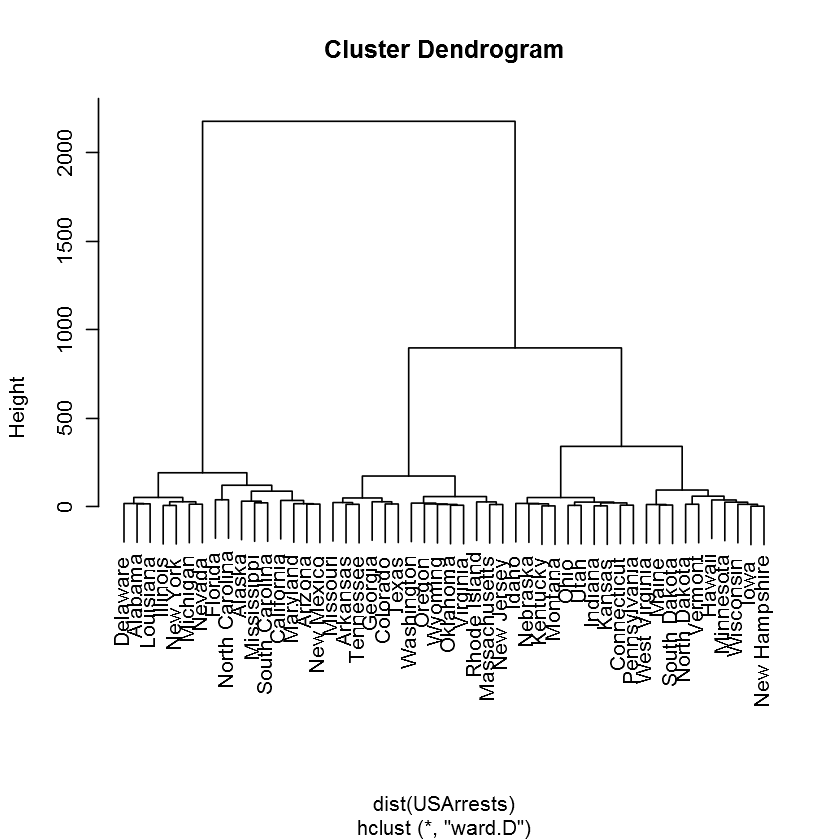

In [4]:
hc4=hclust(dist(USArrests),method="ward.D")
windows()
plot(hc4)

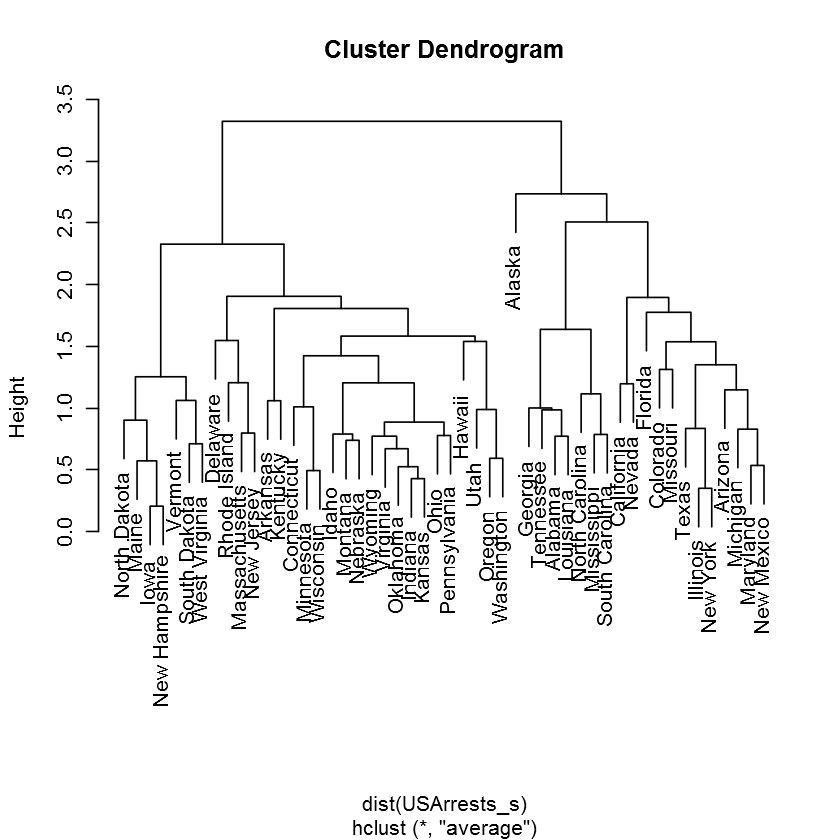

In [5]:
USArrests_s=scale(USArrests)
hc3=hclust(dist(USArrests_s),method="average")
plot(hc3)
hc3_result=cutree(hc3,k=5)

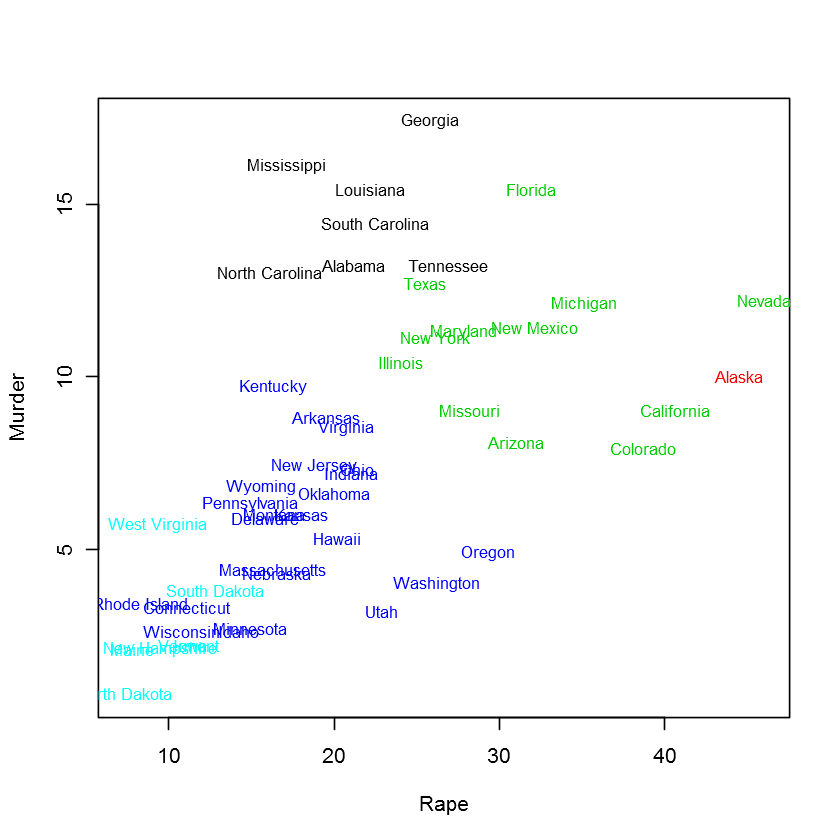

In [7]:
plot(Murder~Rape,data=USArrests,type="n")
text(USArrests$Rape,USArrests$Murder,
     rownames(USArrests),col=hc3_result,cex=0.8)

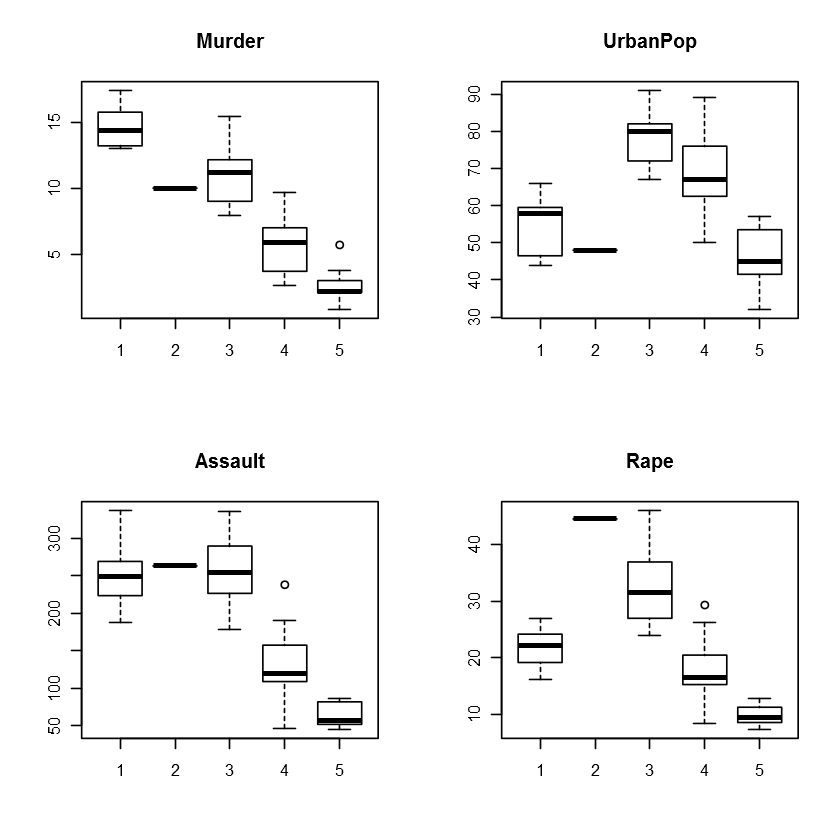

In [8]:
par(mfcol=c(2,2))
for (i in 1:4){
boxplot(USArrests[,i]~hc3_result,main=names(USArrests)[i])
}


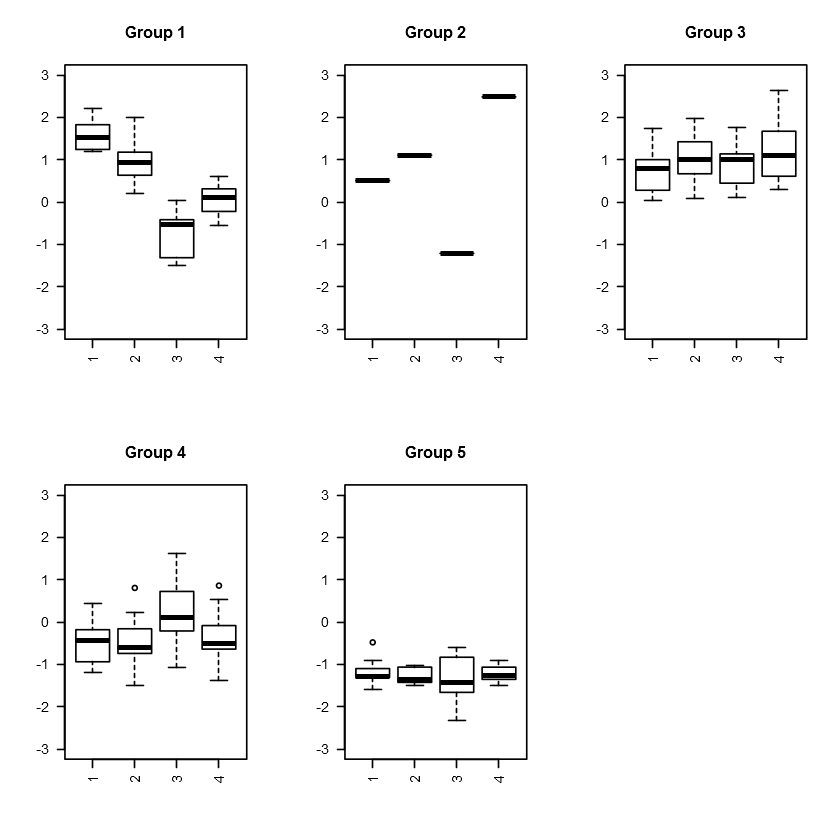

In [9]:
par(mfrow=c(2,3))
for (i in 1:5){
  boxplot(matrix(USArrests_s[hc3_result==i,],,4),
          las=2,main=paste("Group",i),ylim=c(-3,3))
}

In [16]:
library(psych)
describeBy(USArrests,group=hc3_result)

Warning message:
"package 'psych' was built under R version 3.3.2"

$`1`
         vars n   mean    sd median trimmed   mad   min   max range  skew
Murder      1 7  14.67  1.69   14.4   14.67  1.78  13.0  17.4   4.4  0.37
Assault     2 7 251.29 48.38  249.0  251.29 44.48 188.0 337.0 149.0  0.42
UrbanPop    3 7  54.29  8.54   58.0   54.29 11.86  44.0  66.0  22.0 -0.04
Rape        4 7  21.69  4.03   22.2   21.69  5.34  16.1  26.9  10.8 -0.13
         kurtosis    se
Murder      -1.66  0.64
Assault     -1.09 18.28
UrbanPop    -1.90  3.23
Rape        -1.68  1.52

$`2`
         vars n  mean sd median trimmed mad   min   max range skew kurtosis se
Murder      1 1  10.0 NA   10.0    10.0   0  10.0  10.0     0   NA       NA NA
Assault     2 1 263.0 NA  263.0   263.0   0 263.0 263.0     0   NA       NA NA
UrbanPop    3 1  48.0 NA   48.0    48.0   0  48.0  48.0     0   NA       NA NA
Rape        4 1  44.5 NA   44.5    44.5   0  44.5  44.5     0   NA       NA NA

$`3`
         vars  n   mean    sd median trimmed   mad   min   max range  skew
Murder      1 12  10.88

### K-means

In [18]:
km=kmeans(USArrests_s,centers = 3,nstart=10)

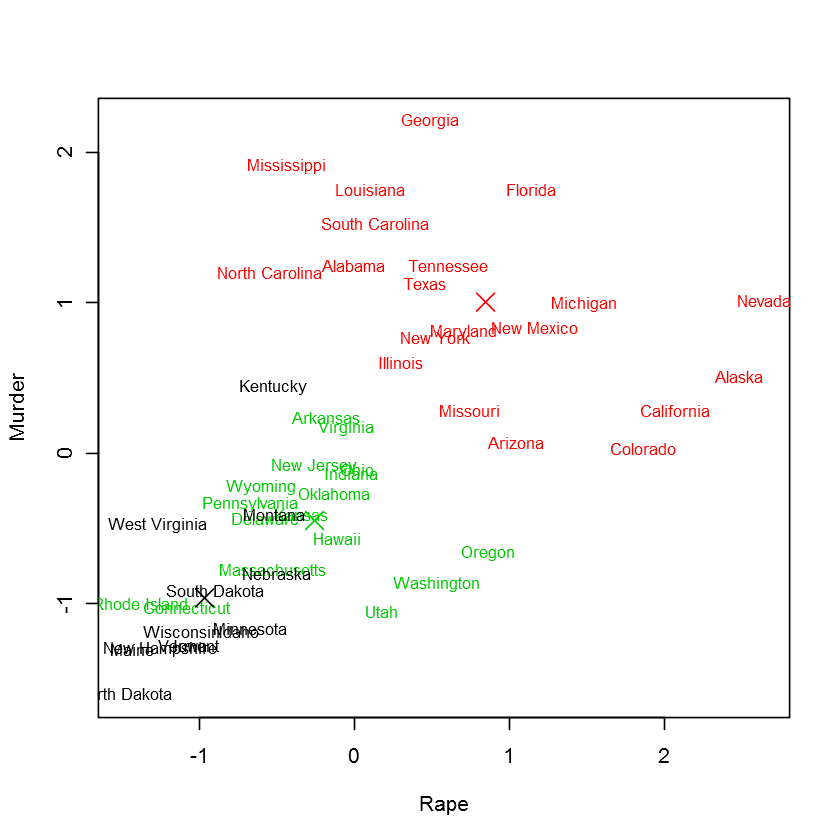

In [19]:
USArrests_s=as.data.frame(USArrests_s)
plot(Murder~Rape,data=USArrests_s,type="n")
text(USArrests_s$Rape,USArrests_s$Murder,
     rownames(USArrests),col=km$cluster,cex=0.8)
points(km$centers[,c(4,1)],col=1:3,pch=4,cex=2)

In [20]:
wss=c()
for (k in 1:20){
  km=kmeans(USArrests_s,centers = k)
  wss[k]=sum(km$withinss)
}

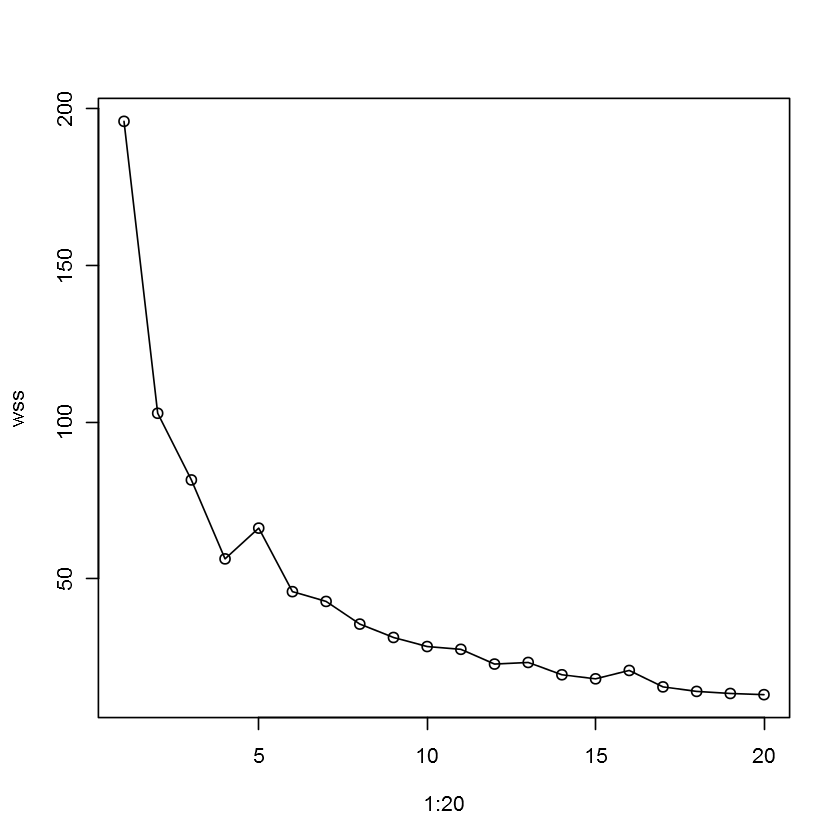

In [21]:
plot(1:20,wss,type='l')
points(1:20,wss)

### jet

In [24]:
jet=read.csv("jet.csv")
jet2=jet
rownames(jet2)=jet2[,1]
jet2=jet2[,-c(1,2,7)]
jet2_s=as.data.frame(scale(jet2))

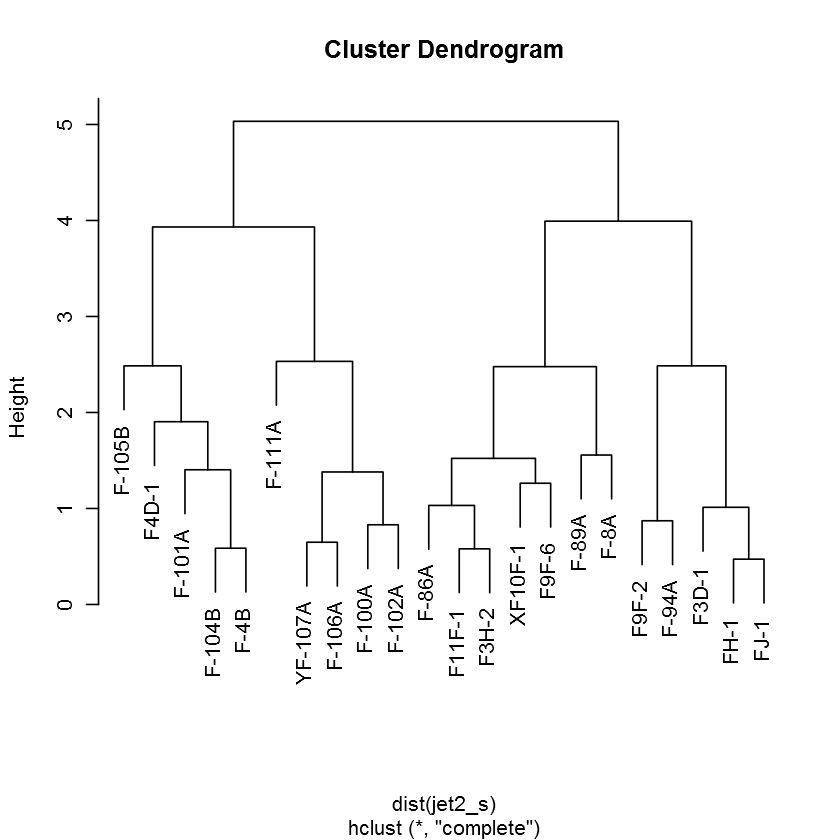

In [25]:
hc=hclust(dist(jet2_s),method="complete")
plot(hc)
jet2_s$cluster=cutree(hc,2)

###

Warning message:
"package 'ggplot2' was built under R version 3.3.2"
Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



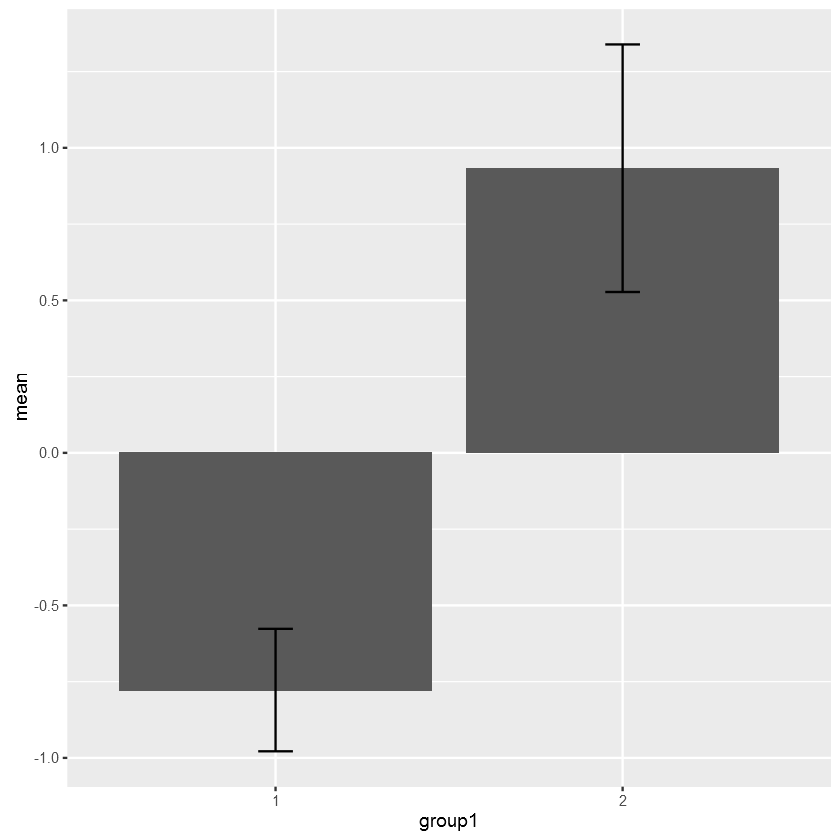

In [26]:
library(ggplot2)
library(psych)
tab=describeBy(jet2_s[,1],group=jet2_s$cluster,mat=T)
ggplot(tab, aes(x=group1,y=mean))+
  geom_bar(position=position_dodge(),stat="identity")+
  geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se,width=0.1))